In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./서울특별시 일반음식점 인허가 정보.csv", encoding='cp949')
print(df.columns)

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수',
       '영업장주변구분명', '등급구분명', '급수시설구분명', '총인원', '본사종업원수', '공장사무직종업원수',
       '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모',
       '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')


In [3]:
df = df[['도로명주소' , '사업장명', '업태구분명', '좌표정보(X)', '좌표정보(Y)']]
df.head()

,도로명주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
0,NaN,일식동경,일식,NaN,NaN
1,서울특별시 종로구 삼일대로 382 (관철동),상해,분식,198867.7026,451824.2811
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),미쿠,일식,193687.3482,442284.1640
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),여름엔빙수겨울엔떡국,한식,189814.3059,443046.2399
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),카페디퍼,기타,204776.5483,444677.6430


In [4]:
df.isna().sum()

도로명주소      1698
사업장명          1
업태구분명        11
좌표정보(X)    1655
좌표정보(Y)    1655
dtype: int64

In [5]:
df = df.dropna()
df.head()

,도로명주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
1,서울특별시 종로구 삼일대로 382 (관철동),상해,분식,198867.7026,451824.2811
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),미쿠,일식,193687.3482,442284.1640
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),여름엔빙수겨울엔떡국,한식,189814.3059,443046.2399
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),카페디퍼,기타,204776.5483,444677.6430
5,서울특별시 동대문구 난계로30길 28-7 1층 (신설동),메이크데이(MakeDay),기타,202114.2284,452392.0938


In [6]:
df["업태구분명"].value_counts().sort_index()

감성주점                223
경양식                9228
기타                17812
김밥(도시락)             583
까페                 2092
냉면집                 103
라이브카페               190
복어취급                 51
분식                 9048
뷔페식                 457
식육(숯불구이)            882
외국음식전문점(인도태국등)     1370
이동조리                  7
일식                 6118
전통찻집                 51
정종/대포집/소주방         2229
중국식                4531
출장조리                100
커피숍                   3
키즈카페                 66
탕류(보신용)             143
통닭(치킨)             2530
패밀리레스트랑             171
패스트푸드               705
한식                52145
호프/통닭             10353
회집                  276
횟집                  295
Name: 업태구분명, dtype: int64

In [7]:
separated_dict = {'경양식':'양식','뷔페식':'양식','패밀리레스트랑':'양식',
'회집':'해산물','횟집':'해산물','복어취급':'해산물',
'분식':'분식','냉면집':'분식','김밥(도시락)':'분식',
'통닭(치킨)':'치킨','호프/통닭':'치킨',
'한식':'한식','탕류(보신용)':'한식',
'커피숍':'카페','까페':'카페','키즈카페':'카페','라이브카페':'카페','전통찻집':'카페','기타':'카페',
'정종/대포집/소주방':'술집','감성주점':'술집',
'식육(숯불구이)':'고기',
'중국식':'중식',
'외국음식전문점(인도태국등)':'외국음식',
'출장조리':None, '이동조리':None}

for i, j in separated_dict.items():
    df = df.replace(i, j)

df = df.dropna()
df.head()

,도로명주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
1,서울특별시 종로구 삼일대로 382 (관철동),상해,분식,198867.7026,451824.2811
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),미쿠,일식,193687.3482,442284.1640
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),여름엔빙수겨울엔떡국,한식,189814.3059,443046.2399
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),카페디퍼,카페,204776.5483,444677.6430
5,서울특별시 동대문구 난계로30길 28-7 1층 (신설동),메이크데이(MakeDay),카페,202114.2284,452392.0938


In [8]:
gu_list = [i.split()[1] for i in df['도로명주소']]
set(gu_list)

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

In [9]:
df.insert(1,'구',gu_list)
df.head()

,도로명주소,구,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
1,서울특별시 종로구 삼일대로 382 (관철동),종로구,상해,분식,198867.7026,451824.2811
2,서울특별시 관악구 신림로59길 15-13 4층 (신림동),관악구,미쿠,일식,193687.3482,442284.1640
3,서울특별시 구로구 구로동로22길 21 1층 (구로동),구로구,여름엔빙수겨울엔떡국,한식,189814.3059,443046.2399
4,서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동),강남구,카페디퍼,카페,204776.5483,444677.6430
5,서울특별시 동대문구 난계로30길 28-7 1층 (신설동),동대문구,메이크데이(MakeDay),카페,202114.2284,452392.0938


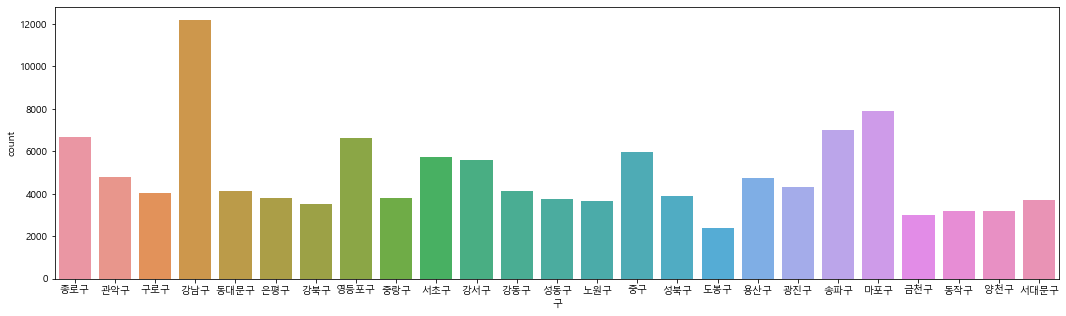

In [271]:
plt.figure(figsize=(18,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['구'])
plt.show()

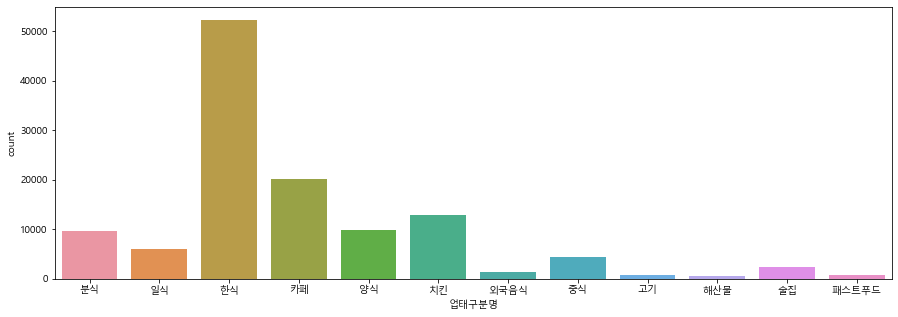

In [272]:
plt.figure(figsize=(15,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['업태구분명'])
plt.show()

In [19]:
"df[df['구'] == gu][df['도로명주소']][df['업태구분명'] == food]['사업장명']"
df[df['도로명주소']]

KeyError: "None of [Index(['서울특별시 종로구 삼일대로 382 (관철동)', '서울특별시 관악구 신림로59길 15-13 4층 (신림동)',\n       '서울특별시 구로구 구로동로22길 21 1층 (구로동)', '서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동)',\n       '서울특별시 동대문구 난계로30길 28-7 1층 (신설동)',\n       '서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동)',\n       '서울특별시 강남구 논현로150길 13 혜창빌딩 지상1층 (논현동)', '서울특별시 강북구 수유로12길 60 1층 (수유동)',\n       '서울특별시 영등포구 의사당대로1길 25 하남빌딩 2층 202호 203(일부)호 (여의도동)',\n       '서울특별시 강남구 테헤란로52길 21 역삼동 벤처빌딩 지하1층 4호 (역삼동)',\n       ...\n       '서울특별시 노원구 덕릉로83길 22 1층 (중계동)', '서울특별시 성북구 성북로5길 6 1층 (성북동1가)',\n       '서울특별시 송파구 동남로18길 23 2층 (가락동)', '서울특별시 강남구 강남대로124길 39 지하1층 101호 (논현동)',\n       '서울특별시 성동구 살곶이길 346-1 1층 (행당동)', '서울특별시 동작구 대림로 55 1층 (신대방동)',\n       '서울특별시 중구 다산로 137 (신당동 1층)', '서울특별시 광진구 동일로24길 28 1층 (화양동)',\n       '서울특별시 강동구 상암로 50 (천호동)',\n       '서울특별시 종로구 종로 19 (종로1가(르메이에르타운 지상1층 110-2호))'],\n      dtype='object', length=121655)] are in the [columns]"

In [16]:
# 자치구 입력
print('자치구 목록')
for i in df['구'].unique():
    print(i, end=', ')
print('원하시는 자치구를 입력해주세요:')
gu = input()

# 음식종류 입력
print('음식종류 목록: 상관없음', end=', ')
for i in df['업태구분명'].unique():
    print(i, end=', ')
print()
print('원하시는 음식종류를 입력해주세요:')
food = input()

if food == '상관없음':
    food_list = df[df['구'] == gu][df['도로명주소']]['사업장명']
else:
    food_list = df[df['구'] == gu][df['도로명주소']][df['업태구분명'] == food]['사업장명']

""" Keyword = pd.DataFrame([gu+' '+i for i in food_list])
Keyword """
food_list

자치구 목록
종로구, 관악구, 구로구, 강남구, 동대문구, 은평구, 강북구, 영등포구, 중랑구, 서초구, 강서구, 강동구, 성동구, 노원구, 중구, 성북구, 도봉구, 용산구, 광진구, 송파구, 마포구, 금천구, 동작구, 양천구, 서대문구, 원하시는 자치구를 입력해주세요:
음식종류 목록: 상관없음, 분식, 일식, 한식, 카페, 양식, 치킨, 외국음식, 중식, 고기, 해산물, 술집, 패스트푸드, 
원하시는 음식종류를 입력해주세요:


KeyError: "None of [Index(['서울특별시 종로구 삼일대로 382 (관철동)', '서울특별시 관악구 신림로59길 15-13 4층 (신림동)',\n       '서울특별시 구로구 구로동로22길 21 1층 (구로동)', '서울특별시 강남구 삼성로85길 33 1층 102-2호 (대치동)',\n       '서울특별시 동대문구 난계로30길 28-7 1층 (신설동)',\n       '서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동)',\n       '서울특별시 강남구 논현로150길 13 혜창빌딩 지상1층 (논현동)', '서울특별시 강북구 수유로12길 60 1층 (수유동)',\n       '서울특별시 영등포구 의사당대로1길 25 하남빌딩 2층 202호 203(일부)호 (여의도동)',\n       '서울특별시 강남구 테헤란로52길 21 역삼동 벤처빌딩 지하1층 4호 (역삼동)',\n       ...\n       '서울특별시 노원구 덕릉로83길 22 1층 (중계동)', '서울특별시 성북구 성북로5길 6 1층 (성북동1가)',\n       '서울특별시 송파구 동남로18길 23 2층 (가락동)', '서울특별시 강남구 강남대로124길 39 지하1층 101호 (논현동)',\n       '서울특별시 성동구 살곶이길 346-1 1층 (행당동)', '서울특별시 동작구 대림로 55 1층 (신대방동)',\n       '서울특별시 중구 다산로 137 (신당동 1층)', '서울특별시 광진구 동일로24길 28 1층 (화양동)',\n       '서울특별시 강동구 상암로 50 (천호동)',\n       '서울특별시 종로구 종로 19 (종로1가(르메이에르타운 지상1층 110-2호))'],\n      dtype='object', length=121655)] are in the [columns]"

In [274]:
Keyword.to_csv('Keyword.csv', index=False)